In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")  


In [2]:
print(df.shape)
print(df.info())
print(df.describe())

(1436, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4

In [3]:
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

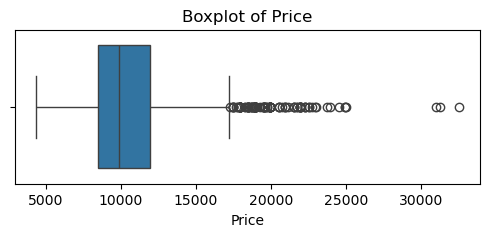

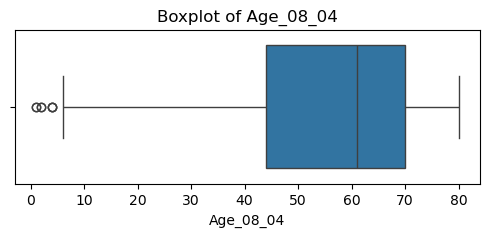

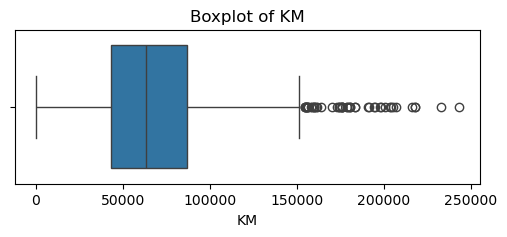

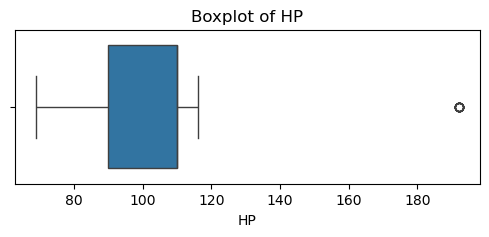

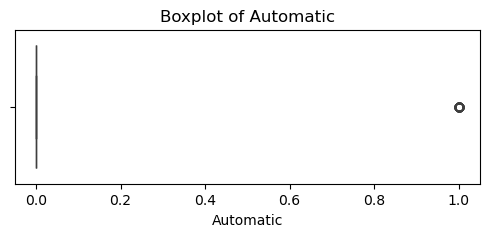

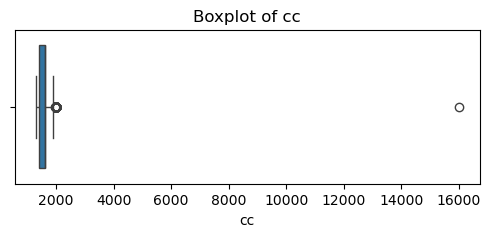

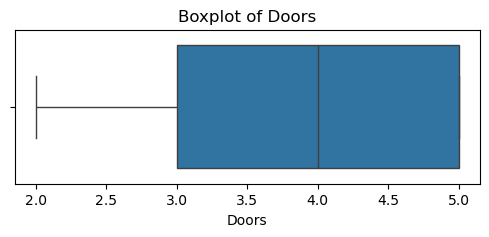

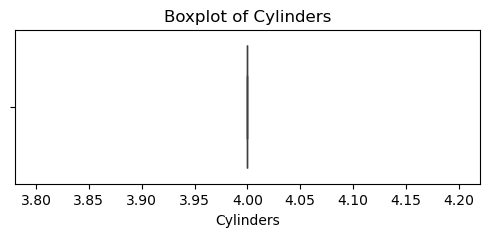

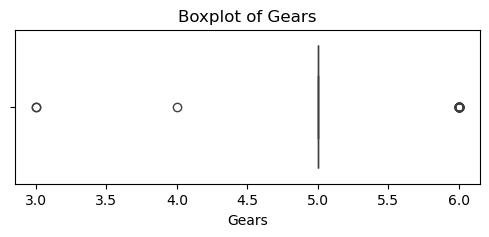

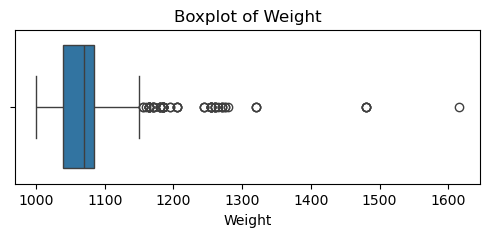

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [9]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the rows with outliers
df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                      (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Diesel'

<Figure size 1000x800 with 0 Axes>

In [12]:
df.dtypes 

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

In [16]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

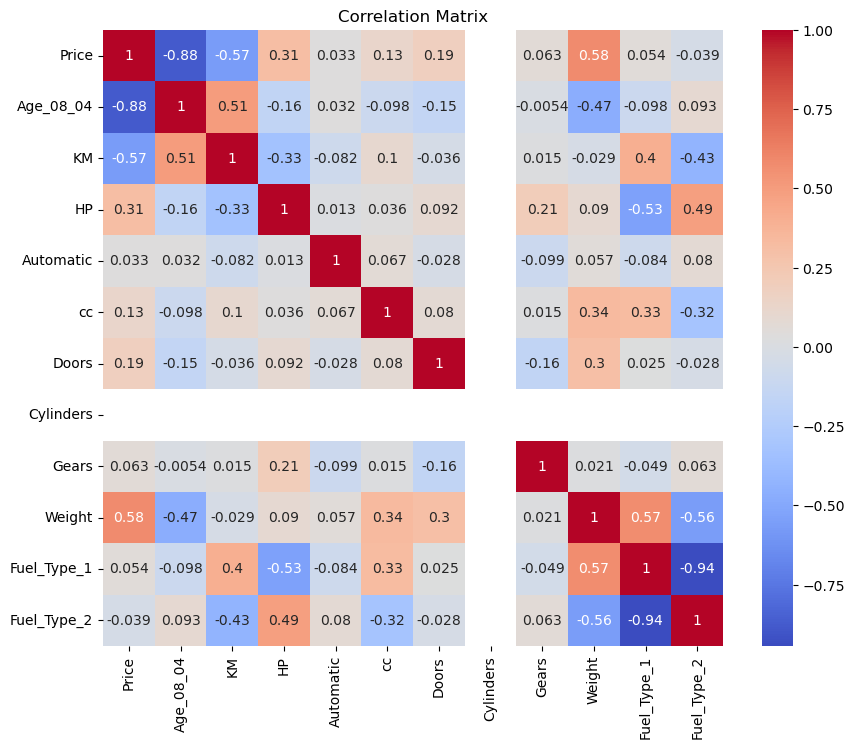

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [18]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_1', 'Fuel_Type_2'],
      dtype='object')

In [19]:
X = df.drop(columns=['Price'])  # replace 'target' with your dependent variable
y = df['Price']


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Coefficients
coef_df = pd.DataFrame(model1.coef_, index=X.columns, columns=["Coefficient"])
print(coef_df)

# Model 2: Top correlated features only (example)
top_features = df.corr()['Price'].abs().sort_values(ascending=False)[1:4].index.tolist()
X_top = df[top_features]
X_top_scaled = scaler.fit_transform(X_top)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

# Model 3: Remove multicollinearity (example)
# You can use Variance Inflation Factor (VIF) to select features, here we just drop one column manually
X3 = df.drop(['Price'], axis=1)  # replace with actual column
X3 = pd.get_dummies(X3, drop_first=True)
X3_scaled = scaler.fit_transform(X3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_scaled, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)


             Coefficient
Age_08_04   -2246.662441
KM           -608.570564
HP            210.253304
Automatic      34.136075
cc            -12.885069
Doors         -57.436845
Cylinders       0.000000
Gears         103.946283
Weight       1362.138679
Fuel_Type_1   -21.270885
Fuel_Type_2   445.102711


In [28]:
def evaluate_model(y_test, y_pred, name="Model"):
    print(f"{name} R2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print('-' * 30)

evaluate_model(y_test, y_pred1, "Model 1")
evaluate_model(y_test2, y_pred2, "Model 2")
evaluate_model(y_test3, y_pred3, "Model 3")

Model 1 R2 Score: 0.8349
Model 1 MSE: 2203043.8231
------------------------------
Model 2 R2 Score: 0.8325
Model 2 MSE: 2234953.0617
------------------------------
Model 3 R2 Score: 0.8349
Model 3 MSE: 2203043.8231
------------------------------


In [29]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_lasso, "Lasso Regression")

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_ridge, "Ridge Regression")

Lasso Regression R2 Score: 0.8349
Lasso Regression MSE: 2202734.6520
------------------------------
Ridge Regression R2 Score: 0.8351
Ridge Regression MSE: 2200682.0097
------------------------------
